# Data Acquisition / Data Loading






## Import Important Libraries


In [ ]:

# Importing necessary standard and third-party libraries

# os: For interacting with the operating system (file paths, directory management, etc.)
# re: For using regular expressions (string searching and manipulation).
# math: Provides mathematical functions and constants.

import os, re, math

# Counter: Efficient way to count hashable objects, commonly used for word frequencies or categorical data.
from collections import Counter

# numpy: Fundamental package for numerical computing with arrays and matrices.
import numpy as np

# pandas: Powerful and flexible data analysis and manipulation tool, especially for tabular data (DataFrames).
import pandas as pd

# matplotlib.pyplot: Widely-used library for creating static, interactive, and animated plots and visualizations.
import matplotlib.pyplot as plt



# Data Wrangling & Labeling

In [ ]:
# If running on Google Colab, mount Google Drive for file access.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fake_path = '/content/drive/MyDrive/Fake news detection datasets/Fake.csv'
true_path = '/content/drive/MyDrive/Fake news detection datasets/True.csv'

fake_df = pd.read_csv(fake_path)
true_df = pd.read_csv(true_path)

fake_df["Label"] = 0
true_df["Label"] = 1

df = pd.concat([fake_df, true_df], ignore_index=True)
print(df['Label'].value_counts())
display(df.sample(5))

Label
0    23481
1    21417
Name: count, dtype: int64


,title,text,subject,date,Label
1162,How The GOP Became The Party Of White Suprema...,The Republican Party has always had a problem ...,News,"June 13, 2017",0
22726,Thanksgiving Day Fake News Turkey Shoot: Boile...,Tune in to the Alternate Current Radio Network...,Middle-east,"November 26, 2017",0
42699,"Thai junta leader, backers fuel suspicions of ...","BANGKOK (Reuters) - In his dark suit, Thai jun...",worldnews,"September 24, 2017",1
27978,"Trump aides, lawmakers hold talks to revive he...",WASHINGTON (Reuters) - Top White House officia...,politicsNews,"April 3, 2017",1
44180,Exclusive: Chile expects to soon clinch Argent...,"VINA DEL MAR, Chile (Reuters) - Chile expects ...",worldnews,"September 7, 2017",1


## Initial Inspection


In [ ]:
# Define file paths to the datasets stored on Google Drive.
# NOTE: These paths are for Google Colab. If running on Kaggle, you should upload the files and adjust the paths accordingly.
fake_path = '/content/drive/MyDrive/Fake news detection datasets/Fake.csv'
true_path = '/content/drive/MyDrive/Fake news detection datasets/True.csv'

# Load the "Fake" and "True" news datasets into separate pandas DataFrames.
fake_df = pd.read_csv(fake_path)
true_df = pd.read_csv(true_path)

# Assign labels: 0 for "Fake" news and 1 for "True" news.
# This creates a new 'Label' column in both DataFrames.
fake_df["Label"] = 0
true_df["Label"] = 1

# Combine both DataFrames into a single DataFrame for easier processing.
# 'ignore_index=True' resets the index in the concatenated DataFrame.
df = pd.concat([fake_df, true_df], ignore_index=True)

# Print the number of "Fake" and "True" samples to check class distribution.
print(df['Label'].value_counts())

# Display a random sample of 5 rows from the combined DataFrame for inspection.
display(df.sample(5))


Shape: (44898, 5)
Columns: ['title', 'text', 'subject', 'date', 'Label']

Missing values per column:
title      0
text       0
subject    0
date       0
Label      0
dtype: int64

Example rows (random 3):


,title,text,subject,date,Label
35305,Ex-Interpol chief says ready to testify for Ar...,BUENOS AIRES (Reuters) - Argentina s previous ...,worldnews,"December 20, 2017",1
29180,U.S. warns North Korea of 'overwhelming' respo...,SEOUL (Reuters) - U.S. President Donald Trump’...,politicsNews,"February 3, 2017",1
29805,Big security risks in Trump feud with spy agen...,WASHINGTON (Reuters) - An unprecedented pre-pr...,politicsNews,"January 13, 2017",1


In [ ]:
# Shuffle the entire DataFrame to randomize the order of the rows.
# This helps prevent any unintended order bias during model training or analysis.
# 'frac=1' means return 100% of the rows in a new, shuffled order.
df = df.sample(frac=1)

# Optional: Display the newly shuffled DataFrame to confirm the shuffle.
print("\nShuffled DataFrame:")
print(df)



Shuffled DataFrame:
                                                   title  \
30232  Ex-Illinois congressman pleads not guilty to s...   
6210    Trump’s Most Disgusting Betrayal Of America (...   
13900  WHOA! Why Is Our Classless President Following...   
35821  China complains about Taiwan content in U.S. d...   
16378  URGENT! 24 HOURS UNTIL SURRENDER OF INTERNET B...   
...                                                  ...   
9523   LEFTY COMMUNIST Calls Trump-Supporting High Sc...   
32268  Clinton vetting retired U.S. Navy Admiral Stav...   
19268  HERE’S WHAT Feminists Left Behind After Their ...   
43084  China's probes of rights lawyers 'alarming': H...   
7006    House Republican Busted For Illegally Using C...   

                                                    text          subject  \
30232  (Reuters) - A former U.S. representative whose...     politicsNews   
6210   Donald Trump s mortgage company was part of th...             News   
13900  Just another classle

##  Exploratory Data Analysis (EDA)

In [ ]:
# Display the shape of the DataFrame (number of rows and columns).
print(df.shape)  # (rows, columns)

# List all column names in the DataFrame.
print(df.columns)

# Show the data type of each column (e.g., int64, object, float64).
print(df.dtypes)

# Count and display the number of missing (NaN) values in each column.
print(df.isna().sum())

# Show the count of each unique row (for detecting duplicate rows).
# NOTE: To display the output, you should add parentheses: df.value_counts()
print(df.value_counts())  # () is required to actually call the method.


(44898, 5)
Index(['title', 'text', 'subject', 'date', 'Label'], dtype='object')
title      object
text       object
subject    object
date       object
Label       int64
dtype: object
title      0
text       0
subject    0
date       0
Label      0
dtype: int64
<bound method DataFrame.value_counts of                                                    title  \
30232  Ex-Illinois congressman pleads not guilty to s...   
6210    Trump’s Most Disgusting Betrayal Of America (...   
13900  WHOA! Why Is Our Classless President Following...   
35821  China complains about Taiwan content in U.S. d...   
16378  URGENT! 24 HOURS UNTIL SURRENDER OF INTERNET B...   
...                                                  ...   
9523   LEFTY COMMUNIST Calls Trump-Supporting High Sc...   
32268  Clinton vetting retired U.S. Navy Admiral Stav...   
19268  HERE’S WHAT Feminists Left Behind After Their ...   
43084  China's probes of rights lawyers 'alarming': H...   
7006    House Republican Busted For Il

In [ ]:
# Show a few random samples from each class (True and Fake news)
# This is helpful for exploring and comparing how the content differs between the classes.

# Display 5 random samples of TRUE news (Label == 1), showing only the 'title' and 'text' columns.
print(df[df["Label"] == 1].sample(5)[["title", "text"]])

# Display 5 random samples of FAKE news (Label == 0), showing only the 'title' and 'text' columns.
print(df[df["Label"] == 0].sample(5)[["title", "text"]])


                                                   title  \
32989  Senate passes bill allowing 9/11 victims to su...   
30437  Trump's dilemma: slower job growth or rising r...   
23485  Trump wants Postal Service to charge 'much mor...   
30528  Clinton team to take part in U.S. state vote r...   
36855  Ukraine president: reforms to get harder as el...   

                                                    text  
32989  WASHINGTON (Reuters) - The U.S. Senate passed ...  
30437  WASHINGTON (Reuters) - A drop in the U.S. unem...  
23485  SEATTLE/WASHINGTON (Reuters) - President Donal...  
30528  WASHINGTON/WEST PAlM BEACH, Fla. (Reuters) - D...  
36855  KIEV (Reuters) - Ukrainian President Petro Por...  
                                                   title  \
13337  DANA LOESCH RIPS INTO OBAMA AND HILLARY: Why G...   
7070    Donald Trump’s Statement After Losing Wiscons...   
11984  PAUL JOSEPH WATSON EXPOSES Lunacy Of Leftists ...   
2552    American Intelligence Agents Fear Giv

 Basic Text Exploration

In [ ]:
# Calculate the total number of documents (rows) in the dataset.
document_count = len(df)

# Print the total number of documents in a user-friendly format.
print(f"Number of documents: {document_count}")


Number of documents: 44898


Now, let's count the number of sentences and analyze the length of documents and sentences in terms of tokens, words, and characters.

In [ ]:
# Import NLTK, a leading natural language processing toolkit.
import nltk

# Download necessary NLTK tokenization resources.
# 'punkt' is required for sentence and word tokenization.
nltk.download('punkt')

# NOTE: 'punkt_tab' is not a standard NLTK resource and will result in an error.
# You can remove or comment out the line below unless you have a specific reason.
# nltk.download('punkt_tab')

from nltk.tokenize import sent_tokenize, word_tokenize

# Combine the 'title' and 'text' columns into a new column for comprehensive length analysis.
df['combined_text'] = df['title'] + ' ' + df['text']

# Calculate the character length of each document.
df['char_count'] = df['combined_text'].apply(len)

# Calculate the word count for each document using NLTK's word_tokenize.
df['word_count'] = df['combined_text'].apply(lambda x: len(word_tokenize(x)))

# Calculate the sentence count for each document using NLTK's sent_tokenize.
df['sentence_count'] = df['combined_text'].apply(lambda x: len(sent_tokenize(x)))

# Print basic statistics for document lengths (in characters, words, and sentences).
print("\nDocument Length Analysis (combined title and text):")
print(f"Average character count: {df['char_count'].mean():.2f}")
print(f"Min character count: {df['char_count'].min()}")
print(f"Max character count: {df['char_count'].max()}")

print(f"Average word count: {df['word_count'].mean():.2f}")
print(f"Min word count: {df['word_count'].min()}")
print(f"Max word count: {df['word_count'].max()}")

print(f"Average sentence count: {df['sentence_count'].mean():.2f}")
print(f"Min sentence count: {df['sentence_count'].min()}")
print(f"Max sentence count: {df['sentence_count'].max()}")

# Analyze sentence length distribution (in words) across all documents.
# Flatten all sentences from all documents into a list.
all_sentences = [sentence for text in df['combined_text'] for sentence in sent_tokenize(text)]

# For each sentence, count the number of words.
sentence_word_counts = [len(word_tokenize(sentence)) for sentence in all_sentences]

# Print sentence length statistics.
print("\nSentence Length Analysis (in words):")
print(f"Average sentence word count: {np.mean(sentence_word_counts):.2f}")
print(f"Min sentence word count: {np.min(sentence_word_counts)}")
print(f"Max sentence word count: {np.max(sentence_word_counts)}")

# Drop the 'combined_text' column as it's no longer needed to save memory and avoid redundancy.
df = df.drop(columns=['combined_text'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Document Length Analysis (combined title and text):
Average character count: 2550.22
Min character count: 31
Max character count: 51893
Average word count: 468.07
Min word count: 5
Max word count: 9970
Average sentence count: 15.00
Min sentence count: 1
Max sentence count: 321

Sentence Length Analysis (in words):
Average sentence word count: 31.20
Min sentence word count: 1
Max sentence word count: 2243


Text Cleaning & Preprocessing

In [ ]:
# Convert the 'text' column of the DataFrame to lowercase and print the result.
# Lowercasing is a common preprocessing step in NLP to ensure case consistency,
# which helps avoid treating 'Word' and 'word' as different tokens.
print(df["text"].str.lower())


30232    (reuters) - a former u.s. representative whose...
6210     donald trump s mortgage company was part of th...
13900    just another classless act in the life of  pre...
35821    beijing (reuters) - china said on thursday it ...
16378    this will be irreversible! call your congressm...
                               ...                        
9523     if you haven t discovered austen fletcher yet,...
32268    washington (reuters) - democratic u.s. preside...
19268                                                     
43084    beijing (reuters) - china has launched more ri...
7006     it is a violation of federal election laws to ...
Name: text, Length: 44898, dtype: object


In [ ]:
%pip install emoji

In [ ]:
# Import the regular expressions module, used for advanced text searching, cleaning, and manipulation.
import re

# Import the 'emoji' library for detecting and processing emojis in text data.
# Useful for datasets that may contain emojis, common in social media or user-generated content.
import emoji


In [ ]:
# Remove all punctuation from the 'text' column using regex.
# [^\w\s] matches any character that is NOT a word character or whitespace.
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove all digits from the text.
# \d+ matches one or more digits.
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))

# Replace multiple spaces with a single space for consistency.
# \s+ matches one or more whitespace characters.
df['text'] = df['text'].apply(lambda x: re.sub(r'\s+', ' ', x))

# Remove any HTML tags from the text.
# <.*?> matches anything that looks like an HTML tag.
df['text'] = df['text'].apply(lambda x: re.sub(r'<.*?>', '', x))

# Remove all emojis from the text using the emoji library's replace_emoji function.
# This ensures only standard text remains.
df['text'] = df['text'].apply(lambda x: emoji.replace_emoji(x, ''))


In [ ]:
# Import key NLP tools from NLTK:

# word_tokenize, sent_tokenize: Functions for splitting text into words and sentences.
from nltk import word_tokenize, sent_tokenize

# stopwords: Provides a set of common words (like 'the', 'is', etc.) to remove from text as they add little value for most NLP tasks.
from nltk.corpus import stopwords

# WordNetLemmatizer: Reduces words to their base form (lemma), e.g., 'running' -> 'run'.
from nltk.stem import WordNetLemmatizer

# PorterStemmer: Reduces words to their stem, e.g., 'running' -> 'run', but more aggressively than lemmatization.
from nltk.stem import PorterStemmer

# Import nltk itself for downloading additional resources.
import nltk

# Download NLTK resources if not already available.
nltk.download('stopwords')   # Download the list of common stopwords.
nltk.download('punkt')       # Download the tokenizer models for sentences and words.
nltk.download('wordnet')     # Download the WordNet database for lemmatization.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Tokenize each document into words using NLTK's word_tokenize.
# This creates a new 'tokens' column, where each entry is a list of words from the corresponding 'text' entry.
# Example: "The news is fake." --> ['The', 'news', 'is', 'fake']
df["tokens"] = df["text"].apply(lambda x: word_tokenize(x))


In [ ]:
# Display a random sample of 5 rows from the DataFrame.
# This allows you to quickly inspect the effect of previous preprocessing steps, including tokenization.
display(df.sample(5))


,title,text,subject,date,Label,char_count,word_count,sentence_count,tokens
29177,Judge orders temporary ban on Trump immigratio...,Reuters A US district judge in Detroit has iss...,politicsNews,"February 3, 2017",1,637,105,2,"[Reuters, A, US, district, judge, in, Detroit,..."
41688,Saudi king says consensus with Russia on broad...,RIYADH Reuters Saudi King Salman said there wa...,worldnews,"October 5, 2017",1,761,131,3,"[RIYADH, Reuters, Saudi, King, Salman, said, t..."
37630,Once triumphant Bosnian Serb commander Mladic ...,SARAJEVO Reuters In the s he was the burly bra...,worldnews,"November 21, 2017",1,7189,1317,55,"[SARAJEVO, Reuters, In, the, s, he, was, the, ..."
5166,"Harvard Republicans Disavow Trump, Call On Th...",Republicans are flocking away from the GOP s p...,News,"August 5, 2016",0,6862,1214,43,"[Republicans, are, flocking, away, from, the, ..."
2031,Meet The Girl Republicans Are Trying Like Hel...,Republicans are hell bent on repealing Obamaca...,News,"March 23, 2017",0,3479,672,22,"[Republicans, are, hell, bent, on, repealing, ..."


In [ ]:
# Import the list of English stopwords from NLTK.
from nltk.corpus import stopwords

# Create a set of stopwords for efficient look-up.
# Stopwords are common words (like 'the', 'is', 'and') that are often removed to improve text analysis.
stop_words = set(stopwords.words('english'))

# Remove stopwords from the tokenized words in each document.
# For each list of tokens, keep only the words that are NOT in the stopwords set.
df["tokens"] = df["tokens"].apply(lambda x: [w for w in x if w not in stop_words])

# Display a random sample of 5 rows to inspect the effect of stopword removal.
display(df.sample(5))


,title,text,subject,date,Label,char_count,word_count,sentence_count,tokens
24726,Bid to 'fix' Iran nuclear deal faces uphill cl...,WASHINGTON Reuters President Donald Trumps cal...,politicsNews,"October 13, 2017",1,2540,474,15,"[WASHINGTON, Reuters, President, Donald, Trump..."
27784,Maryland lawmakers approve bill to fight drug ...,WASHINGTON Reuters Maryland lawmakers have pas...,politicsNews,"April 11, 2017",1,2680,474,18,"[WASHINGTON, Reuters, Maryland, lawmakers, pas..."
9013,Obama’s Photographer Releases White House’s M...,Having stayed close to the Obama family for bo...,News,"January 2, 2016",0,3693,685,16,"[Having, stayed, close, Obama, family, Preside..."
44229,Does not make sense to keep Charter of Fundame...,LONDON Reuters It does not make sense for Brit...,worldnews,"September 7, 2017",1,960,187,7,"[LONDON, Reuters, It, make, sense, Britain, re..."
3531,Air Force Secretary Delivers EPIC Smackdown T...,If anybody besides Boeing is going to know the...,News,"December 7, 2016",0,3128,615,19,"[If, anybody, besides, Boeing, going, know, de..."


In [ ]:
# Import the PorterStemmer from NLTK for stemming words.
from nltk.stem import PorterStemmer

# Initialize the stemmer.
Stemmer = PorterStemmer()

# Apply stemming to each token in the 'tokens' column.
# Stemming reduces words to their root form (e.g., 'running', 'runs' → 'run'),
# which helps normalize vocabulary and reduces dimensionality in text analysis.
df["tokens"] = df["tokens"].apply(lambda x: [Stemmer.stem(w) for w in x])


In [ ]:
display(df.sample(5))

,title,text,subject,date,Label,char_count,word_count,sentence_count,tokens
23296,‘STRANGER THINGS’ – Hollywood MK Ultra Goes Fu...,Jay Dyer st Century WireThe popular s pastiche...,Middle-east,"July 26, 2016",0,13916,2556,77,"[jay, dyer, st, centuri, wireth, popular, past..."
19429,WHY DECISION To Cut Off Gas Deliveries To Trum...,An owner of a propane dealership in Maine is r...,left-news,"Dec 18, 2016",0,1502,264,6,"[an, owner, propan, dealership, main, refus, d..."
24332,"At long last, ground broken for Eisenhower mem...",This version of the November nd story correct...,politicsNews,"November 2, 2017",1,2808,541,16,"[thi, version, novemb, nd, stori, correct, amo..."
23463,"Eyewitness Says Feds Ambushed Bundys, 100 Shot...",Patrick Henningsen st Century Wire UPDATE Last...,Middle-east,"January 27, 2016",0,15590,2845,49,"[patrick, henningsen, st, centuri, wire, updat..."
27500,Taiwan says no plans 'at this stage' for phone...,TAIPEI Reuters Taiwans presidential office on ...,politicsNews,"April 28, 2017",1,875,166,4,"[taipei, reuter, taiwan, presidenti, offic, fr..."


5. Statistical Analysis & Visualization


In [ ]:
# Import Counter for counting hashable objects (words, in this case).
from collections import Counter

# Flatten the list of token lists into a single list containing all words in the dataset.
all_words = [word for tokens in df["tokens"] for word in tokens]

# Count the frequency of each word in the dataset.
word_counts = Counter(all_words)

# Get the 10 most common words and their counts.
top_words = word_counts.most_common(10)

# Print the top 10 most frequent words after preprocessing (cleaning, tokenizing, stopword removal, and stemming).
print(top_words)


[('said', 130055), ('trump', 128657), ('the', 102766), ('us', 63197), ('state', 60368), ('i', 58305), ('presid', 56333), ('would', 54947), ('peopl', 41382), ('new', 40874)]


In [ ]:
# For each unique class label (0 = Fake, 1 = True), analyze the most common words.
for x in df["Label"].unique():
    # Extract all tokens belonging to the current class.
    words = [word for tokens in df[df["Label"] == x]["tokens"] for word in tokens]

    # Count the frequency of each word within this class.
    word_counts = Counter(words)

    # Print the top 10 most frequent words for this class.
    print(f"\nTop words for class {x}:")
    print(word_counts.most_common(10))



Top words for class 1:
[('said', 99039), ('the', 58669), ('trump', 54372), ('us', 41148), ('state', 36647), ('would', 31520), ('reuter', 28404), ('presid', 28386), ('republican', 22114), ('govern', 20220)]

Top words for class 0:
[('trump', 74285), ('the', 44097), ('i', 43172), ('said', 31016), ('presid', 27947), ('peopl', 26054), ('one', 23752), ('state', 23721), ('would', 23427), ('new', 22553)]


In [ ]:
label_map = {0: "Fake", 1: "True"}
for x in df["Label"].unique():
    # ...rest of code...
    print(f"\nTop words for class {x} ({label_map[x]}):")


[(('donald', 'trump'), 23337), (('unit', 'state'), 18393), (('white', 'hous'), 14692), (('hillari', 'clinton'), 9207), (('new', 'york'), 8647), (('presid', 'donald'), 6954), (('washington', 'reuter'), 6488), (('north', 'korea'), 6481), (('imag', 'via'), 6204), (('i', 'think'), 6165)]


In [ ]:
# Import ngrams from NLTK for generating n-gram sequences (here, trigrams).
from nltk import ngrams

# Generate trigrams (sequences of 3 words) from each document's tokens.
# 'token' here refers to the list of words in each document.
trigrams = [tg for token in df["tokens"] for tg in ngrams(token, 3)]

# Count the frequency of each trigram in the entire dataset.
trigrams_counts = Counter(trigrams)

# Get the 10 most common trigrams and their counts.
trigrams_feq = trigrams_counts.most_common(10)

# Print the top 10 most frequent trigrams after preprocessing.
print(trigrams_feq)


[(('presid', 'donald', 'trump'), 6753), (('presid', 'barack', 'obama'), 3778), (('us', 'presid', 'donald'), 2591), (('donald', 'j', 'trump'), 2147), (('new', 'york', 'time'), 2002), (('st', 'centuri', 'wire'), 1904), (('j', 'trump', 'realdonaldtrump'), 1692), (('washington', 'reuter', 'us'), 1669), (('washington', 'reuter', 'the'), 1557), (('the', 'unit', 'state'), 1502)]


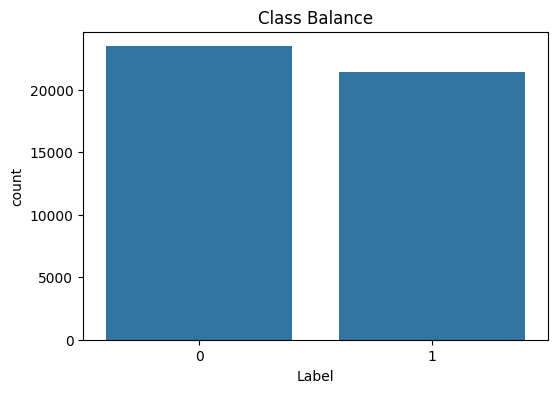

In [ ]:
# Import plotting libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure with a specified size.
plt.figure(figsize=(6,4))

# Plot a countplot showing the distribution of the 'Label' column (class balance).
# This helps visualize how many samples belong to each class (Fake vs True news).
sns.countplot(x='Label', data=df)

# Add a descriptive title.
plt.title('Class Balance')

# Display the plot.
plt.show()


 Feature Engineering


In [ ]:
# Import feature extraction tools from scikit-learn for vectorizing text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Join tokens back into a single string per document for vectorization.
text = [" ".join(tokens) for tokens in df["tokens"]]

# -------- Bag-of-Words Representation --------
# Initialize the CountVectorizer, which creates a matrix of token counts (Bag-of-Words model).
vectorizer = CountVectorizer()

# Fit the vectorizer on the text data and transform the text into a document-term matrix.
X_bow = vectorizer.fit_transform(text)

# -------- TF-IDF Representation --------
# Initialize the TfidfVectorizer, which creates a matrix of TF-IDF features.
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the text data and transform the text into a TF-IDF matrix.
X_tfidf = vectorizer.fit_transform(text)

# Print the shape of the Bag-of-Words matrix: (number of documents, number of unique words).
print(X_bow.shape)

# Print the first 10 feature (vocabulary) names from the Bag-of-Words model.
print(vectorizer.get_feature_names_out()[:10])

# Print the shape of the TF-IDF matrix: (number of documents, number of unique words).
print(X_tfidf.shape)

# Print the first 10 feature names from the TF-IDF model.
print(vectorizer.get_feature_names_out()[:10])


(44898, 183020)
['_____' '_______' '_________________________'
 '__________________________' '___________the' '_____burn' '___q__'
 '___supportsdonaldtrump' '__saada' '_a_w_w_r_']
(44898, 183020)
['_____' '_______' '_________________________'
 '__________________________' '___________the' '_____burn' '___q__'
 '___supportsdonaldtrump' '__saada' '_a_w_w_r_']


In [ ]:
# Install the gensim library, which is widely used for topic modeling (e.g., LDA) and word embeddings (Word2Vec, FastText).
# Note: Use '%pip' (with a %) only in Jupyter, Colab, or Kaggle notebooks, not in regular .py scripts.
%pip install gensim


In [ ]:
# Import the Word2Vec model from gensim.
from gensim.models import Word2Vec

# Train a Word2Vec model on the dataset.
# Input: a list of token lists (one per document).
# - vector_size: Dimensionality of the word vectors (commonly 100-300).
# - window: Maximum distance between the current and predicted word within a sentence.
# - min_count: Ignores all words with total frequency lower than this.
# - workers: Number of worker threads to train the model (for speed).
model = Word2Vec(df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Get the numeric vector representation for the word 'news'.
word_vec = model.wv['news']



In [ ]:
# Retrieve the vector representation for the word 'state' from the trained Word2Vec model.
word_vec = model.wv['state']


Model Building (Classic ML)


Train-Test Split

In [ ]:
# Import the train_test_split function for splitting the data into training and testing sets.
from sklearn.model_selection import train_test_split

# Assign the TF-IDF features to X and the target labels to y.
X = X_tfidf
y = df["Label"]

# Split the dataset into training and testing sets.
# - test_size=0.2: 20% of the data will be used for testing.
# - stratify=y: Ensures class proportions remain consistent in both train and test sets (important for imbalanced data).
# - random_state=42: For reproducibility (ensures the split is the same each run).
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


Train Baseline Models

In [ ]:
# Import common supervised learning models for text classification.
from sklearn.linear_model import LogisticRegression    # Linear model for binary/multiclass classification.
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes, well-suited for word counts and TF-IDF.
from sklearn.svm import LinearSVC                     # Linear Support Vector Machine, effective for text data.

# Create a dictionary of model names and their corresponding initialized model objects.
models = {
    "Logistic_Reg": LogisticRegression(),         # Logistic Regression
    "naive_bayes": MultinomialNB(),               # Multinomial Naive Bayes
    "svm": LinearSVC()                            # Linear SVM
}

# Train each model on the training data.
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully")


Logistic_Reg trained successfully
naive_bayes trained successfully
svm trained successfully


Evaluation

Logistic_Reg evaluation:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



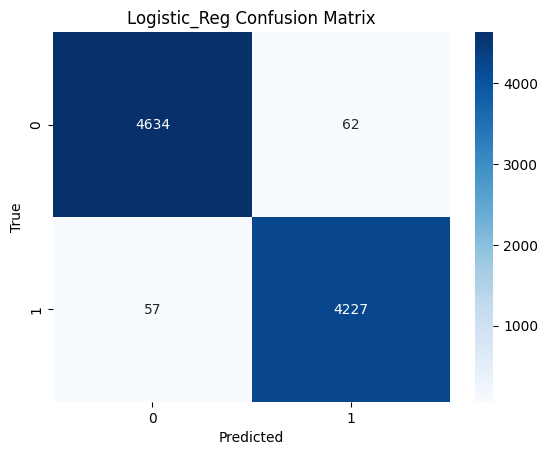

naive_bayes evaluation:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4696
           1       0.94      0.94      0.94      4284

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



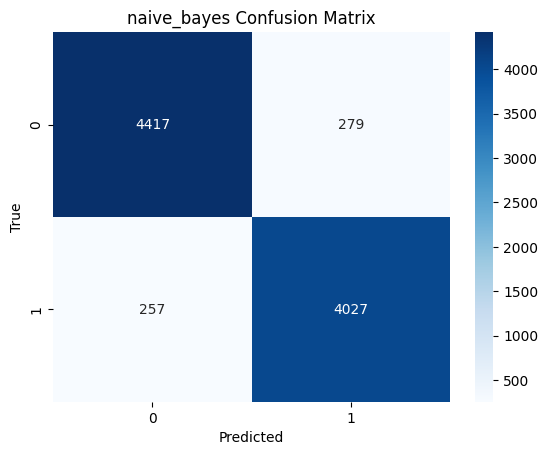

svm evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4696
           1       1.00      0.99      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



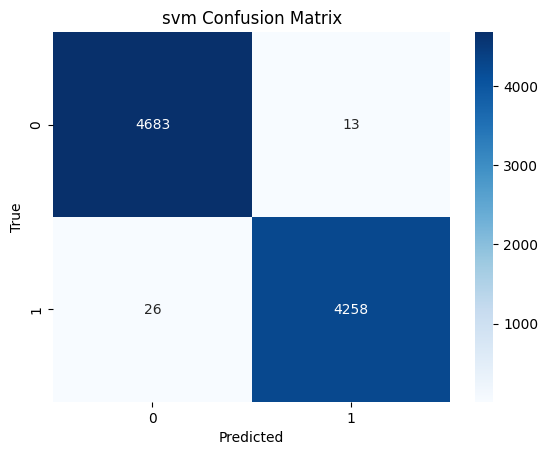

In [ ]:
# Import classification metrics and visualization tools.
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate each trained model.
for name, model in models.items():
    # Predict the labels for the test set.
    y_pred = model.predict(X_test)

    # Print the classification report (precision, recall, f1-score, support for each class).
    print(f"{name} evaluation:")
    print(classification_report(y_test, y_pred))

    # Compute the confusion matrix.
    cm = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix using a heatmap.
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


In [ ]:
# Import cross-validation utilities and numpy for numerical operations.
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation on the entire dataset using Logistic Regression.
# - max_iter=2000: Increase the maximum number of iterations for convergence (especially for large datasets).
# - scoring="f1_macro": Evaluate performance using the macro-averaged F1-score (treats all classes equally).
# - cv=5: Use 5 folds for cross-validation.
scores = cross_val_score(LogisticRegression(max_iter=2000),
                         X, y, cv=5, scoring="f1_macro")

# Print the F1 scores for each fold.
print("Cross-val F1 scores:", scores)

# Print the mean F1 score across all folds.
print("Mean F1:", np.mean(scores))


Cross-val F1 scores: [0.98661224 0.98616068 0.98683511 0.98716584 0.98538139]
Mean F1: 0.986431051872278


Next Action: Bias / Leakage Check



Train on titles only.

Train on bodies only.

Compare with full text

In [ ]:
# Import required tools for feature extraction, modeling, and cross-validation.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a function to evaluate a feature set using TF-IDF vectorization and logistic regression.
def evaluate_feature(source, label):
    # Create a TF-IDF vectorizer with:
    # - ngram_range=(1,2): Unigrams and bigrams.
    # - min_df=5: Ignore terms that appear in fewer than 5 documents.
    # - max_df=0.9: Ignore terms that appear in more than 90% of documents (very common terms).
    vec = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_df=0.9)

    # Transform the input text into TF-IDF features.
    X = vec.fit_transform(source)

    # Run 5-fold cross-validation using Logistic Regression.
    # Return the mean and standard deviation of the macro F1 scores.
    scores = cross_val_score(LogisticRegression(max_iter=2000), X, label, cv=5, scoring="f1_macro")
    return np.mean(scores), np.std(scores)

# Evaluate using only the title as the feature.
mean_f1_title, std_title = evaluate_feature(df["title"], df["Label"])
print("Title only F1:", mean_f1_title, "±", std_title)

# Evaluate using only the article body (text) as the feature.
mean_f1_body, std_body = evaluate_feature(df["text"], df["Label"])
print("Body only F1:", mean_f1_body, "±", std_body)

# Evaluate using both the title and the body concatenated as the feature.
mean_f1_full, std_full = evaluate_feature(df["title"] + " " + df["text"], df["Label"])
print("Full text F1:", mean_f1_full, "±", std_full)


Title only F1: 0.9545203803478506 ± 0.002285376893470061
Body only F1: 0.9904028395209968 ± 0.0002722915439741594
Full text F1: 0.9871908804900459 ± 0.000682564369802673


In [ ]:
# Import train-test split, TF-IDF vectorizer, and logistic regression classifier.
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Prepare features and labels:
# - Use both title and text concatenated, vectorized using TF-IDF with unigrams and bigrams.
# - min_df=5: Ignore very rare words/bigrams.
# - max_df=0.9: Ignore very common words/bigrams.
X = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_df=0.9).fit_transform(df["title"] + " " + df["text"])
y = df["Label"]

# Split the data into training and testing sets, preserving class distribution.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train a logistic regression classifier.
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)

# Predict on the test set.
y_pred = clf.predict(X_test)

# Identify misclassified samples (where prediction does not match the true label).
# First, find indices of misclassified samples.
misclassified_indices = y_test.index[y_test.reset_index(drop=True) != y_pred]

# Retrieve the misclassified rows from the original DataFrame.
misclassified = df.loc[misclassified_indices]

print("Number of misclassified samples:", len(misclassified))

# Show a few examples of misclassified articles.
display(misclassified[["title", "text", "Label"]].head(5))


Number of misclassified samples: 117


,title,text,Label
33186,Cruz unleashes fury at Trump over Lee Harvey O...,WASHINGTON Reuters Republican presidential hop...,1
16814,BREAKING: NORTH KOREA Detains American Student...,Apparently it takes just one American student ...,0
29799,Singer Jennifer Holliday pulls out of Trump in...,LOS ANGELES Reuters Broadway star Jennifer Hol...,1
32640,Police reveal names of Orlando club shooting v...,Orlando Fla Reuters A day before the Orlando F...,1
15619,BREAKING: 4 AMERICAN HOSTAGES TAKEN BY IRAN-BA...,These hostages must certainly feel a sense of ...,0


In [ ]:
import numpy as np

# Vectorize the full text (title + body) using TF-IDF with unigrams and bigrams.
# min_df=5: ignore very rare words/bigrams
# max_df=0.9: ignore very common words/bigrams
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_df=0.9)
X = vectorizer.fit_transform(df["title"] + " " + df["text"])

# Train a logistic regression classifier on the full dataset.
clf = LogisticRegression(max_iter=2000)
clf.fit(X, df["Label"])

# Get feature (word/ngram) names as a numpy array.
feature_names = np.array(vectorizer.get_feature_names_out())

# Extract the coefficients (weights) for each feature from the trained model.
# For binary classification, coef_[0] contains the weights for class 1 (True news).
coefs = clf.coef_[0]

# Identify the 20 words/bigrams with the lowest coefficients (most predictive of class 0: Fake news).
top_fake = feature_names[np.argsort(coefs)[:20]]

# Identify the 20 words/bigrams with the highest coefficients (most predictive of class 1: True news).
top_true = feature_names[np.argsort(coefs)[-20:]]

# Print the most predictive words for each class.
print("Top words predicting Fake news:\n", top_fake)
print("\nTop words predicting True news:\n", top_true)


Top words predicting Fake news:
 ['video' 'is' 'obama' 'this' 'you' 'that' 'hillary' 'via' 'just' 'america'
 're' 'wire' 'president trump' 'image' 'gop' 'they' 'watch' 'our' 'it'
 'trump']

Top words predicting True news:
 ['he said' 'said the' 'wednesday' 'reuters the' 'on monday' 'said in'
 'washington' 'on friday' 'minister' 'republican' 'us' 'its' 'on thursday'
 'on tuesday' 'on wednesday' 'washington reuters' 'said on' 'trumps'
 'reuters' 'said']


LLM Fine-Tuning

In [ ]:
# Install HuggingFace libraries for advanced NLP:
# - transformers: State-of-the-art pretrained language models (BERT, RoBERTa, etc.)
# - datasets: Easy access to a wide variety of NLP datasets and efficient data handling
# - evaluate: Standardized evaluation metrics for NLP tasks
# The "-q" flag suppresses unnecessary output for a cleaner log.
!pip install transformers datasets evaluate -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.0 MB/s eta 0:00:00


In [ ]:
from datasets import Dataset, ClassLabel, Value

# Combine the 'title' and 'text' columns into a new 'combined' column for transformer input.
df["combined"] = df["title"] + " " + df["text"]

# Convert the pandas DataFrame to a HuggingFace Dataset, using only the combined text and label.
hf_dataset = Dataset.from_pandas(df[["combined", "Label"]])

# Rename columns to the expected HuggingFace field names: 'text' and 'label'.
hf_dataset = hf_dataset.rename_column("combined", "text")
hf_dataset = hf_dataset.rename_column("Label", "label")

# Explicitly set the 'label' column type to ClassLabel for compatibility with HuggingFace models.
# This enables easier mapping between class indices and human-readable names.
features = hf_dataset.features
features['label'] = ClassLabel(num_classes=2, names=['fake', 'true'])
hf_dataset = hf_dataset.cast(features)

# Split the dataset into train and test sets, stratified by label to preserve class distribution.
hf_dataset = hf_dataset.train_test_split(test_size=0.2, stratify_by_column="label", seed=42)


Casting the dataset:   0%|          | 0/44898 [00:00<?, ? examples/s]

In [ ]:
from transformers import DistilBertTokenizerFast

# Load the pretrained DistilBERT tokenizer.
# 'distilbert-base-uncased' is a lightweight, fast transformer suitable for text classification.
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# Define a function to tokenize a batch of examples from the HuggingFace Dataset.
def tokenize(batch):
    # Tokenize and encode the text with:
    # - padding="max_length": Pad all sequences to the same length (max_length).
    # - truncation=True: Truncate sequences longer than max_length.
    # - max_length=256: Set the max sequence length to 256 tokens.
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=256)

# Apply the tokenizer to the entire dataset (batched for efficiency).
tokenized = hf_dataset.map(tokenize, batched=True)

# Remove the original text column, as it's no longer needed after tokenization.
tokenized = tokenized.remove_columns(["text"])

# Set the dataset format to 'torch' tensors for compatibility with PyTorch models.
tokenized.set_format("torch")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/35918 [00:00<?, ? examples/s]

Map:   0%|          | 0/8980 [00:00<?, ? examples/s]

In [ ]:
from transformers import DistilBertForSequenceClassification

# Load the pre-trained DistilBERT model for sequence classification.
# - "distilbert-base-uncased": The base DistilBERT model, uncased (lowercase only).
# - num_labels=2: Two output classes (fake and true news).
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2
)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments, Trainer
import evaluate
import numpy as np

# Load evaluation metrics from HuggingFace's evaluate library.
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

# Define a function to compute evaluation metrics during model training and evaluation.
def compute_metrics(eval_pred):
    logits, labels = eval_pred                      # Unpack model outputs (logits) and true labels.
    preds = np.argmax(logits, axis=-1)              # Get predicted class by taking the argmax over logits.
    return {
        # Compute accuracy.
        "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
        # Compute macro-averaged F1-score.
        "f1": f1.compute(predictions=preds, references=labels, average="macro")["f1"]
    }


In [ ]:
from transformers import TrainingArguments

# Set up training arguments for the HuggingFace Trainer.
training_args = TrainingArguments(
    output_dir="./results",           # Directory to save model checkpoints and predictions.
    eval_strategy="epoch",            # Evaluate the model at the end of each training epoch.
    save_strategy="epoch",            # Save the model at the end of each training epoch.
    learning_rate=2e-5,               # Learning rate for optimizer.
    per_device_train_batch_size=16,   # Batch size per device during training.
    per_device_eval_batch_size=16,    # Batch size per device during evaluation.
    num_train_epochs=3,               # Total number of training epochs.
    weight_decay=0.01,                # Weight decay (L2 regularization).
    logging_dir="./logs",             # Directory to store logs.
    logging_steps=50,                 # Log metrics every 50 steps.
    load_best_model_at_end=True,      # Load the best checkpoint at the end of training (according to evaluation metric).
    report_to="none"                  # Disable reporting to third-party logging (e.g., WandB).
)


In [ ]:
import os

# Disable Weights & Biases (wandb) logging to avoid unwanted online tracking or errors if wandb is not configured.
os.environ["WANDB_DISABLED"] = "true"

# Set up the HuggingFace Trainer object.
trainer = Trainer(
    model=model,                          # The pre-trained DistilBERT model for classification.
    args=training_args,                   # TrainingArguments configured earlier.
    train_dataset=tokenized["train"],     # Training set, already tokenized and formatted for PyTorch.
    eval_dataset=tokenized["test"],       # Evaluation (test) set, tokenized and formatted.
    compute_metrics=compute_metrics       # Function to compute metrics (accuracy, F1, etc.).
)

# Start the training process.
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.000100,0.003629,0.999443,0.999442
2,0.000100,0.004562,0.999332,0.999330
3,0.000000,0.003421,0.999220,0.999219


TrainOutput(global_step=6735, training_loss=0.005962067082646678, metrics={'train_runtime': 2689.5857, 'train_samples_per_second': 40.063, 'train_steps_per_second': 2.504, 'total_flos': 7136946037389312.0, 'train_loss': 0.005962067082646678, 'epoch': 3.0})

In [ ]:
# Evaluate the trained model on the test dataset and print metrics (accuracy, F1, etc.).
trainer.evaluate()


{'eval_loss': 0.003420833731070161,
 'eval_accuracy': 0.9992204899777283,
 'eval_f1': 0.9992188536760956,
 'eval_runtime': 66.4248,
 'eval_samples_per_second': 135.19,
 'eval_steps_per_second': 8.461,
 'epoch': 3.0}

In [ ]:
# Save the trained model to disk for future use or deployment.
trainer.save_model("distilbert_fake_news")

# Example texts for inference (prediction).
texts = [
    "Breaking: Federal Reserve announces new stimulus package",
    "Shocking video proves stock market will crash tomorrow!"
]

# Tokenize the input texts for the model.
inputs = tokenizer(
    texts,
    padding=True,          # Pad to the same length.
    truncation=True,       # Truncate longer texts.
    return_tensors="pt"    # Return PyTorch tensors.
)

# Move the input tensors to the same device as the model (CPU or GPU).
device = model.device
inputs = {key: value.to(device) for key, value in inputs.items()}

# Perform inference: get the logits (raw scores) from the model.
outputs = model(**inputs)

# Get the predicted class for each text (0 = Fake, 1 = True).
preds = outputs.logits.argmax(dim=1)

print(preds)  # 0 = Fake, 1 = True


tensor([0, 0], device='cuda:0')


In [ ]:
from torch.utils.data import DataLoader
import torch

# Create a DataLoader for the test set to batch and efficiently iterate through data.
test_loader = DataLoader(tokenized["test"], batch_size=16)

model.eval()  # Set the model to evaluation mode (disables dropout, etc.)
all_preds = []   # To collect all model predictions.
all_labels = []  # To collect all true labels.

with torch.no_grad():  # Disable gradient computation (faster inference, less memory usage)
    for batch in test_loader:
        # Prepare input tensors for the model, excluding non-input columns.
        # 'label' is used for evaluation, not as input to the model.
        # '__index_level_0__' is an artifact from Dataset, should be ignored.
        inputs = {k: v.to(model.device) for k, v in batch.items() if k != "label" and k != '__index_level_0__'}
        labels = batch["label"].to(model.device)

        # Forward pass: get model predictions (logits).
        outputs = model(**inputs)
        preds = outputs.logits.argmax(dim=1)

        # Collect predictions and true labels for evaluation.
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert prediction and label lists to numpy arrays for further analysis or metric computation.
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

print("Shape of predictions:", all_preds.shape)
print("Shape of labels:", all_labels.shape)


Shape of predictions: (8980,)
Shape of labels: (8980,)


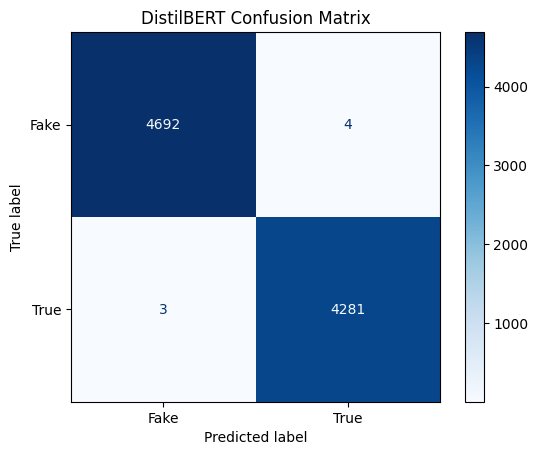

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix using the true and predicted labels.
cm = confusion_matrix(all_labels, all_preds)

# Create a ConfusionMatrixDisplay for easy visualization.
# 'display_labels' maps the class indices to human-readable names.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True'])

# Plot the confusion matrix with a blue color map.
disp.plot(cmap="Blues")
plt.title("DistilBERT Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd

# Convert the results to a DataFrame for easy inspection and analysis.
# - Retrieve the original 'text' using the test set indices.
# - Store both the true and predicted labels for each sample.
errors = pd.DataFrame({
    "text": df.loc[tokenized["test"]["__index_level_0__"], "text"].reset_index(drop=True),
    "true_label": all_labels,
    "predicted_label": all_preds
})

# Keep only the rows where the predicted label does not match the true label (i.e., misclassifications).
misclassified = errors[errors["true_label"] != errors["predicted_label"]]

print("Number of misclassified samples:", len(misclassified))

# Display up to 5 random misclassified examples (fewer if there are less than 5).
display(misclassified.sample(min(5, len(misclassified)), random_state=42))


Number of misclassified samples: 7


,text,true_label,predicted_label
172,WASHINGTON The clock began running out this we...,1,0
242,Reuters is reporting US President Donald Trum...,0,1
3540,MIDDLETOWN CONN Two years ago Judy Konopka and...,1,0
764,Today several Democracy Spring protesters were...,0,1
2476,Is anyone else FED UPOn Friday Arizona Rep Pau...,0,1


In [ ]:
save_path = "distilbert_fake_news_final"

# Save the trained model to the specified directory.
model.save_pretrained(save_path)

# Save the tokenizer to the same directory, ensuring future compatibility with the model.
tokenizer.save_pretrained(save_path)

print(f"Model + tokenizer saved at: {save_path}")


Model + tokenizer saved at: distilbert_fake_news_final


In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

# Reload the fine-tuned DistilBERT model from the saved directory.
loaded_model = DistilBertForSequenceClassification.from_pretrained(save_path)

# Reload the corresponding tokenizer to ensure consistent text preprocessing.
loaded_tokenizer = DistilBertTokenizerFast.from_pretrained(save_path)


In [ ]:
import torch

def predict(texts, model, tokenizer):
    model.eval()  # Set the model to evaluation mode.
    # Tokenize the input texts for the model.
    # - padding=True: Pads texts to the same length.
    # - truncation=True: Truncates texts that are too long.
    # - return_tensors="pt": Returns PyTorch tensors.
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt").to(model.device)

    with torch.no_grad():  # No gradient computation needed for inference.
        outputs = model(**inputs)  # Get model predictions (logits).
        preds = outputs.logits.argmax(dim=1).cpu().numpy()  # Get class with highest logit score.
    return preds

# Test the function with sample texts.
sample_texts = [
    "Breaking: Federal Reserve announces new stimulus package",
    "Shocking video proves stock market will crash tomorrow!"
]
print(predict(sample_texts, loaded_model, loaded_tokenizer))  # Output: 0 = Fake, 1 = True


[0 0]


In [ ]:
!pip install onnx onnxruntime -q
# If you have a CUDA GPU and want GPU inference later:
# !pip install onnxruntime-gpu -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.2 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

model_dir = "distilbert_fake_news_final"  # Directory where the trained model and tokenizer are saved

# Reload the trained DistilBERT model and tokenizer from disk.
model = DistilBertForSequenceClassification.from_pretrained(model_dir)
tokenizer = DistilBertTokenizerFast.from_pretrained(model_dir)

model.eval()        # Set model to evaluation mode (important before exporting/inference)
model.to("cpu")     # Move model to CPU (ONNX export is device-agnostic, but CPU is typical)

# Create a dummy input batch of two short texts.
# Any content is fine, as this is just for tracing the computation graph.
dummy = tokenizer(
    ["example text one", "another example"],
    padding="max_length",     # Pad to the maximum sequence length (set below)
    truncation=True,          # Truncate if needed
    max_length=256,           # Use the same max_length as training/inference
    return_tensors="pt"       # Return PyTorch tensors
)

input_ids = dummy["input_ids"]           # Tensor shape: [batch_size, sequence_length]
attention_mask = dummy["attention_mask"] # Tensor shape: [batch_size, sequence_length]


In [ ]:
onnx_path = "distilbert_fake_news.onnx"

# Export the trained PyTorch model to ONNX format for deployment.
torch.onnx.export(
    model,                                 # The loaded PyTorch model
    (input_ids, attention_mask),           # Tuple of model inputs (as required by DistilBERT)
    onnx_path,                             # Output file path
    input_names=["input_ids", "attention_mask"],   # Names for model inputs
    output_names=["logits"],                        # Name for the model output
    dynamic_axes={
        "input_ids": {0: "batch_size", 1: "sequence"},       # Allow variable batch and sequence length
        "attention_mask": {0: "batch_size", 1: "sequence"},
        "logits": {0: "batch_size"}                          # Output varies by batch size
    },
    opset_version=14,                        # ONNX opset version (13+ works well for most Transformers)
    do_constant_folding=True                 # Optimize constant expressions
)

print(f"ONNX model saved to: {onnx_path}")


/tmp/ipython-input-3039437535.py:3: DeprecationWarning: You are using the legacy TorchScript-based ONNX export. Starting in PyTorch 2.9, the new torch.export-based ONNX exporter will be the default. To switch now, set dynamo=True in torch.onnx.export. This new exporter supports features like exporting LLMs with DynamicCache. We encourage you to try it and share feedback to help improve the experience. Learn more about the new export logic: https://pytorch.org/docs/stable/onnx_dynamo.html. For exporting control flow: https://pytorch.org/tutorials/beginner/onnx/export_control_flow_model_to_onnx_tutorial.html.
  torch.onnx.export(
/usr/local/lib/python3.12/dist-packages/transformers/modeling_attn_mask_utils.py:196: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause th

ONNX model saved to: distilbert_fake_news.onnx


In [ ]:
import onnx

# Load the exported ONNX model from disk.
onnx_model = onnx.load(onnx_path)

# Check the model for structural validity and consistency.
onnx.checker.check_model(onnx_model)

print("ONNX graph looks valid ✅")


ONNX graph looks valid ✅


In [ ]:
import numpy as np
import onnxruntime as ort
import torch

texts = [
    "Breaking: Federal Reserve announces new stimulus package",
    "Shocking video proves stock market will crash tomorrow!"
]

# A) PyTorch prediction
pt_inputs = tokenizer(texts, padding=True, truncation=True, max_length=256, return_tensors="pt")
with torch.no_grad():
    pt_logits = model(**pt_inputs).logits
pt_preds = pt_logits.argmax(dim=1).cpu().numpy()

# B) ONNX Runtime prediction
sess = ort.InferenceSession(onnx_path, providers=["CPUExecutionProvider"])
ort_inputs = {
    "input_ids": pt_inputs["input_ids"].cpu().numpy().astype(np.int64),
    "attention_mask": pt_inputs["attention_mask"].cpu().numpy().astype(np.int64)
}
ort_logits = sess.run(None, ort_inputs)[0]
ort_preds = ort_logits.argmax(axis=1)

print("PyTorch preds:", pt_preds)   # 0 = Fake, 1 = True
print("ONNX preds   :", ort_preds)
print("Match?       :", np.array_equal(pt_preds, ort_preds))


PyTorch preds: [0 0]
ONNX preds   : [0 0]
Match?       : True
